In [97]:
import pandas as pd
import numpy as np
import utils

# Data Preparation

In [98]:
spcpath = './data/lan_spc_1.csv'
LAN_CSV_DCT, spc_csv = utils.read_csv(spcpath)
LAN_NAME_ARR = np.array(spc_csv['LAN'])[:-2] # exclude MIN & MAX
LAN_NAME_LST = list(LAN_NAME_ARR)


Check all 208 files ...
Got 27 cfr files
['RTL8112' 'RTL8112L' 'RTL8131' '82567LF' 'RTL8103EL' 'AR8131L-AL1E'
 'WG82578DM' 'RTL8111E-VB' 'WG82567V' 'WG82583V' 'WG82579V' 'AR8151'
 'RTL8111E-VL' 'WG82579LM' 'RTL8111F-VB' 'AR8161-AL3A-R' 'AR8161-BL3A-R'
 'RTL8111DP-VC' 'WGI217V' 'RTL8111G-CG' 'RTL8111GR-CG' 'WGI217LM'
 'WGI218V' 'WGI211AT(A2)' 'WGI218LM' 'RTL8111EP-CG' 'RTL8111H-CG']


In [99]:
# NORMALIZE ALL VALUES

raw_spc = np.array(spc_csv.iloc[:,1:]) # exclude name
S_ALL = utils.create_S(raw_spc)
s_scaler, S_ALL_NORM = utils.scale(S_ALL)
print ("S_ALL_NORM.shape: {0}".format(S_ALL_NORM.shape))

ftr_dct = utils.show_spc(S_ALL_NORM, LAN_NAME_ARR)

S_ALL_NORM.shape: (29, 13)
|             |Tmst |Year |Mont |New  |IC2L |Nm2G |Nm2L |AD2G |AD2L |Gd2G |Gd2L |PwPn |ESD  |
|LAN          |0_Ts |1_Yr |2_Mt |3_N  |4_IL |5_NG |6_NL |7_AG |8_AL |9_GG |10GL |11Pn |12ED |
|-            |-    |-    |-    |-    |-    |-    |-    |-    |-    |-    |-    |-    |-    |
|RTL8112      | 0.25| 0.27| 0.00| 0.00| 0.05| 0.20| 0.05| 0.30| 0.05| 0.75| 0.30| 0.30| 0.40|
|RTL8112L     | 0.26| 0.27| 0.18| 0.00| 0.05| 0.20| 0.05| 0.30| 0.05| 0.75| 0.30| 0.30| 0.40|
|RTL8131      | 0.26| 0.27| 0.18| 0.00| 0.05| 0.20| 0.05| 0.30| 0.05| 0.75| 0.30| 0.30| 0.40|
|82567LF      | 0.28| 0.27| 0.55| 0.00| 0.05| 0.20| 0.05| 0.30| 0.05| 0.75| 0.30| 0.30| 0.40|
|RTL8103EL    | 0.29| 0.27| 0.64| 0.00| 0.05| 0.20| 0.05| 0.30| 0.05| 0.75| 0.30| 0.30| 0.40|
|AR8131L-AL1E | 0.30| 0.27| 0.82| 0.00| 0.05| 0.20| 0.05| 0.30| 0.05| 0.75| 0.30| 0.25| 0.40|
|WG82578DM    | 0.31| 0.33| 0.00| 0.00| 0.05| 0.20| 0.05| 0.30| 0.05| 0.75| 0.30| 0.30| 0.40|
|RTL8111E-VB  | 0.32| 0.33| 0.09|

In [100]:
"""
different data source (from MB team's Excel)
"""

CSV_RTL8111E_VL = pd.read_csv('./data/RTL8111E-VL.csv', encoding='big5')
CSV_RTL8111F_VB = pd.read_csv('./data/RTL8111F-VB.csv', encoding='big5')
CSV_RTL8111G_CG = pd.read_csv('./data/RTL8111G-CG.csv', encoding='big5')
CSV_RTL8111GR_CG = pd.read_csv('./data/RTL8111GR-CG.csv', encoding='big5')
CSV_RTL8111H_CG = pd.read_csv('./data/RTL8111H-CG.csv', encoding='big5')

# 120 is B5~E4
cfr_rtl8111e_vl = CSV_RTL8111E_VL.iloc[120, 3:39].apply(lambda x: float(x.replace('%',''))) 
cfr_rtl8111e_vl_list = cfr_rtl8111e_vl.T.tolist()


# 993 is C3~F2
cfr_rtl8111f_vb = CSV_RTL8111F_VB.iloc[993, 3:39].apply(lambda x: float(x.replace('%','')))
cfr_rtl8111f_vb_list = cfr_rtl8111f_vb.T.tolist()

# 119 is D6-G5
cfr_rtl8111g_cg = CSV_RTL8111G_CG.iloc[119, 2:38].apply(lambda x: float(x.replace('%','')))
cfr_rtl8111g_cg_list = cfr_rtl8111g_cg.T.tolist()


# 123 is E1-EC, 121 is D6-G5
cfr_rtl8111gr_cg = CSV_RTL8111GR_CG.iloc[121, 2:38].apply(lambda x: float(x.replace('%','')))
cfr_rtl8111gr_cg_list = cfr_rtl8111gr_cg.T.tolist()


# 102 is F4~HB
cfr_rtl8111h_cg = CSV_RTL8111H_CG.iloc[102, 2:34].apply(lambda x: float(x.replace('%','')))
cfr_rtl8111h_cg_list = cfr_rtl8111h_cg.T.tolist()
cfr_rtl8111h_cg_list.append(cfr_rtl8111h_cg_list[-1])
cfr_rtl8111h_cg_list.append(cfr_rtl8111h_cg_list[-1])
cfr_rtl8111h_cg_list.append(cfr_rtl8111h_cg_list[-1])
cfr_rtl8111h_cg_list.append(cfr_rtl8111h_cg_list[-1])


# CFR
c_all = np.array(cfr_rtl8111e_vl_list + cfr_rtl8111f_vb_list + 
                 cfr_rtl8111g_cg_list + cfr_rtl8111gr_cg_list + cfr_rtl8111h_cg_list).reshape(-1, 1)
_scaler, _ = utils.scale(c_all)

def scale_lst_to_arr(scaler, lst):
    return np.array([scaler.transform(v) for v in lst]).reshape(len(lst))
C = []
C.append(scale_lst_to_arr(_scaler, cfr_rtl8111e_vl_list))
C.append(scale_lst_to_arr(_scaler, cfr_rtl8111f_vb_list))
C.append(scale_lst_to_arr(_scaler, cfr_rtl8111g_cg_list))
C.append(scale_lst_to_arr(_scaler, cfr_rtl8111gr_cg_list))
C.append(scale_lst_to_arr(_scaler, cfr_rtl8111h_cg_list))

c_exl_norm = np.array(C).reshape(5,36,1)

print ("c_exl_norm.shape: {0}".format(c_exl_norm.shape))
print ("c_exl_norm[0]:")

print (c_exl_norm[0].T)

c_exl_norm.shape: (5, 36, 1)
c_exl_norm[0]:
[[0.         0.00763359 0.03435115 0.07251908 0.11068702 0.14885496
  0.18320611 0.22137405 0.26335878 0.30152672 0.34732824 0.38931298
  0.43129771 0.47328244 0.51145038 0.54961832 0.58015267 0.61068702
  0.63740458 0.66412214 0.69083969 0.71374046 0.74045802 0.77099237
  0.79770992 0.82824427 0.85114504 0.87022901 0.88931298 0.90839695
  0.92366412 0.9389313  0.95419847 0.96946565 0.98473282 1.        ]]


# Prepare Keras

# <<固定seed>>

In [101]:
RANDOM_SEED = '43'

import numpy as np
import tensorflow as tf
import random as rn

# 以下是 Python 3.2.3 以上所必需的，
# 为了使某些基于散列的操作可复现。
# https://docs.python.org/3.4/using/cmdline.html#envvar-PYTHONHASHSEED
# https://github.com/keras-team/keras/issues/2280#issuecomment-306959926

import os
os.environ['PYTHONHASHSEED'] = '0'

# 以下是 Numpy 在一个明确的初始状态生成固定随机数字所必需的。

np.random.seed(int(RANDOM_SEED))

# 以下是 Python 在一个明确的初始状态生成固定随机数字所必需的。

rn.seed(int(RANDOM_SEED))

# 强制 TensorFlow 使用单线程。
# 多线程是结果不可复现的一个潜在的来源。
# 更多详情，见: https://stackoverflow.com/questions/42022950/which-seeds-have-to-be-set-where-to-realize-100-reproducibility-of-training-res
# !! for 效能因素，此次暫不使用 !!
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)

from keras import backend as K
import keras

# `tf.set_random_seed()` 将会以 TensorFlow 为后端，
# 在一个明确的初始状态下生成固定随机数字。
# 更多详情，见: https://www.tensorflow.org/api_docs/python/tf/set_random_seed

tf.set_random_seed(int(RANDOM_SEED))

# !! for 效能因素，此次暫不使用 !!
# sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
# K.set_session(sess)

# import tensorflow as tf

# config = tf.ConfigProto()
# GPU 記憶體不夠時增加
session_conf.gpu_options.allow_growth = True
# 只使用 10% 的 GPU 記憶體
session_conf.gpu_options.per_process_gpu_memory_fraction = 0.25

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
# sess = tf.Session(config=session_conf)
# 設定 Keras 使用的 TensorFlow Session
K.set_session(sess)

In [102]:
import math
import h5py
import scipy
from scipy import ndimage
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.python.framework import ops

from keras.models import load_model, Model, Sequential
from keras.layers import Bidirectional, Concatenate, Permute, Dot, Input, LSTM, GRU,\
                         Multiply, Flatten, Embedding, SimpleRNN, RepeatVector, Dense, Activation, Lambda, Reshape,\
                         Dropout
from keras import callbacks as Kcallback
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Activation

from keras import __version__ as keras__version__


In [103]:
import sys
print("python: {}, keras: {}, tensorflow: {}".format(sys.version, keras__version__, tf.__version__))

python: 3.5.2 (default, Nov 23 2017, 16:37:01) 
[GCC 5.4.0 20160609], keras: 2.1.6, tensorflow: 1.5.0


# Build Pre-processes for Prediction and Evaluation

# Setup Training Set, Feature Space and others for Evaluation

In [104]:
LN5_SET = ['RTL8111E-VL', 'RTL8111F-VB', 'RTL8111G-CG', 'RTL8111GR-CG', 'RTL8111H-CG']
L10_SET = ['RTL8111E-VL', 'RTL8111F-VB', 'RTL8111G-CG', 'RTL8111GR-CG', 'RTL8111H-CG',
           'AR8131L-AL1E', 'WG82579V', 'AR8161-AL3A-R', 'WGI217V', 'WGI218V']
LN8_SET = ['RTL8111E-VL', 'RTL8111F-VB', 'RTL8111G-CG', 'RTL8111GR-CG', 'RTL8111H-CG',
           'AR8131L-AL1E', 'WG82579V', 'WGI218V']


LTB_SET = ['RTL8112L', 'AR8131L-AL1E', 'RTL8111E-VB', 'RTL8111E-VL', 'RTL8111F-VB',
           'AR8161-BL3A-R', 'RTL8111G-CG', 'RTL8111GR-CG', 'WGI218V', 'RTL8111H-CG']

L27_SET = ['RTL8112', 'RTL8112L', 'RTL8131', '82567LF', 'RTL8103EL', 'AR8131L-AL1E',
           'WG82578DM', 'RTL8111E-VB', 'WG82567V', 'WG82583V', 'WG82579V', 'AR8151',
           'RTL8111E-VL', 'WG82579LM', 'RTL8111F-VB', 'AR8161-AL3A-R', 'AR8161-BL3A-R',
           'RTL8111DP-VC', 'WGI217V', 'RTL8111G-CG', 'RTL8111GR-CG', 'WGI217LM',
           'WGI218V', 'WGI211AT(A2)', 'WGI218LM', 'RTL8111EP-CG', 'RTL8111H-CG']

L18_SET = ['RTL8112L', 'AR8131L-AL1E', 'RTL8111E-VB', 'WG82567V', 'WG82583V',
           'WG82579V', 'RTL8111E-VL', 'WG82579LM', 'RTL8111F-VB', 'AR8161-AL3A-R',
           'AR8161-BL3A-R', 'WGI217V', 'RTL8111G-CG', 'RTL8111GR-CG', 'WGI217LM',
           'WGI218V', 'WGI211AT(A2)', 'RTL8111H-CG']
L13_SET = ['RTL8112L', 'AR8131L-AL1E', 'RTL8111E-VB', 'WG82579V', 'RTL8111E-VL',
           'RTL8111F-VB', 'AR8161-AL3A-R', 'AR8161-BL3A-R', 'WGI217V', 'RTL8111G-CG',
           'RTL8111GR-CG', 'WGI218V', 'RTL8111H-CG']
L12_SET = ['RTL8112L', 'AR8131L-AL1E', 'RTL8111E-VB', 'WG82579V', 'RTL8111E-VL',
           'RTL8111F-VB', 'AR8161-AL3A-R', 'AR8161-BL3A-R', 'WGI217V', 'RTL8111G-CG',
           'RTL8111GR-CG', 'WGI218V']
L25_SET = ['RTL8112', 'RTL8112L', 'RTL8131', 'RTL8103EL', 'AR8131L-AL1E',
           'WG82578DM', 'RTL8111E-VB', 'WG82567V', 'WG82583V', 'WG82579V',
           'RTL8111E-VL', 'WG82579LM', 'RTL8111F-VB', 'AR8161-AL3A-R', 'AR8161-BL3A-R',
           'RTL8111DP-VC', 'WGI217V', 'RTL8111G-CG', 'RTL8111GR-CG', 'WGI217LM',
           'WGI218V', 'WGI211AT(A2)', 'WGI218LM', 'RTL8111EP-CG', 'RTL8111H-CG']

In [105]:
MODEL_PATH = "./ongo/" + "CFR_MODEL_LSTM[LrDsDsDsDsDr_f11hn512bs3dp0.001]_Model_R0_aefghijklm_v2_LTB_spc1.h5"
ftr_set = [0] + list(range(4, S_ALL_NORM.shape[1])); VERSION = 2; TAR_NAMES = LTB_SET;

TARGET = sorted(set(spc_csv.loc[spc_csv['LAN'].isin(TAR_NAMES)].index.tolist()))

ffx = ""
for v in ftr_set:
    ffx += chr(v+97)
print("ffx: %s" % ffx)

ffx: aefghijklm


In [106]:

c_dft_norm, _, C_SCALER = utils.create_C(LAN_CSV_DCT, LAN_NAME_ARR, TARGET)
s_all_norm = S_ALL_NORM[:, ftr_set]
print("s_all_norm: {0}".format(s_all_norm.shape))
s_all_norm_f = S_ALL_NORM[TARGET][:, ftr_set]
print("s_all_norm_f: {0}".format(s_all_norm_f.shape))



Target ids: [1, 5, 7, 12, 14, 16, 19, 20, 22, 26]
c_norm.shape: (10, 36, 1)
s_all_norm: (29, 10)
s_all_norm_f: (10, 10)


In [107]:

AR8_NAMES = ['AR8131L-AL1E', 'AR8151', 'AR8161-AL3A-R', 'AR8161-BL3A-R']
RTL_NAMES = ['RTL8112', 'RTL8112L', 'RTL8131', 'RTL8111DP-VC', 'RTL8111E-VB', 'RTL8111EP-CG']
WGI_NAMES = ['WG82567V', 'WG82578DM', 'WG82579V', 'WG82579LM', 'WG82583V']
WG8_NAMES = ['WGI211AT(A2)', 'WGI217LM', 'WGI217V', 'WGI218V', 'WGI218LM']
TRG_NAMES = list(LAN_NAME_ARR[TARGET])


In [108]:
ALL_SETS = []
ALL_SETS.append(TARGET)
AR8_SET = [LAN_NAME_LST.index(name) for name in AR8_NAMES]; ALL_SETS.append(AR8_SET)
RTL_SET = [LAN_NAME_LST.index(name) for name in RTL_NAMES]; ALL_SETS.append(RTL_SET)
WGI_SET = [LAN_NAME_LST.index(name) for name in WGI_NAMES]; ALL_SETS.append(WGI_SET)
WG8_SET = [LAN_NAME_LST.index(name) for name in WG8_NAMES]; ALL_SETS.append(WG8_SET)

print(["{:4s}".format(str(i)) for i in ftr_set])

S_SETS = []
for i in range(len(ALL_SETS)):
    s_tar = s_all_norm[ALL_SETS[i]]
    S_SETS.append(s_tar)
    print("s_set " + str(i))
    for row in s_tar:
        A = ["{:0.2f}".format(s) for s in row]
        print (A)

['0   ', '4   ', '5   ', '6   ', '7   ', '8   ', '9   ', '10  ', '11  ', '12  ']
s_set 0
['0.26', '0.05', '0.20', '0.05', '0.30', '0.05', '0.75', '0.30', '0.30', '0.40']
['0.30', '0.05', '0.20', '0.05', '0.30', '0.05', '0.75', '0.30', '0.25', '0.40']
['0.32', '0.02', '0.20', '0.05', '0.30', '0.05', '0.75', '0.30', '0.38', '0.40']
['0.38', '0.05', '0.20', '0.05', '0.30', '0.05', '0.75', '0.30', '0.38', '0.40']
['0.44', '0.05', '0.20', '0.05', '0.30', '0.05', '0.75', '0.30', '0.30', '0.40']
['0.46', '0.05', '0.10', '0.05', '0.30', '0.05', '0.75', '0.30', '0.25', '0.40']
['0.52', '0.10', '0.20', '0.10', '0.30', '0.10', '0.75', '0.30', '0.30', '0.40']
['0.52', '0.10', '0.20', '0.10', '0.30', '0.10', '0.75', '0.30', '0.30', '0.40']
['0.57', '0.05', '0.20', '0.05', '0.30', '0.05', '0.75', '0.30', '0.30', '0.40']
['0.64', '0.10', '0.20', '0.10', '0.30', '0.10', '0.75', '0.30', '0.38', '0.40']
s_set 1
['0.30', '0.05', '0.20', '0.05', '0.30', '0.05', '0.75', '0.30', '0.25', '0.40']
['0.37', '0.

In [109]:
CFR_ARRS = []
for i in range(len(ALL_SETS)):

    SET = ALL_SETS[i]
    print("SET {0}".format(i))

    def scale_lst_to_arr(scaler, lst):
        return np.array([scaler.transform(v) for v in lst]).reshape(len(lst))
    
    _, G, _ = utils.create_C(LAN_CSV_DCT, LAN_NAME_ARR, SET)
    CFR_ARR = G.reshape(G.shape[0], G.shape[1])
    L = []
    [L.append(scale_lst_to_arr(C_SCALER, arr)) for arr in CFR_ARR]

    CFR_ARR_sc = np.array(L).reshape(CFR_ARR.shape[0], CFR_ARR.shape[1], 1)
    print ("Got cfr arr of shape {0}".format(CFR_ARR_sc.shape))
    CFR_ARRS.append(CFR_ARR_sc)

SET 0
Target ids: [1, 5, 7, 12, 14, 16, 19, 20, 22, 26]
c_norm.shape: (10, 36, 1)
Got cfr arr of shape (10, 36, 1)
SET 1
Target ids: [5, 11, 15, 16]
c_norm.shape: (4, 36, 1)
Got cfr arr of shape (4, 36, 1)
SET 2
Target ids: [0, 1, 2, 17, 7, 25]
c_norm.shape: (6, 36, 1)
Got cfr arr of shape (6, 36, 1)
SET 3
Target ids: [8, 6, 10, 13, 9]
c_norm.shape: (5, 36, 1)
Got cfr arr of shape (5, 36, 1)
SET 4
Target ids: [23, 21, 18, 22, 24]
c_norm.shape: (5, 36, 1)
Got cfr arr of shape (5, 36, 1)


In [110]:
pred_timesteps = 36

_, _, F, Y = utils.get_xy_from_sAc(s_all_norm_f, c_dft_norm, pred_timesteps, list(range(c_dft_norm.shape[0])))
X = F[:,:,(3-VERSION):]
input_features = X.shape[2]
output_features = Y.shape[2]
hidden_neurons = 512

model_inf = utils.round_part_inf(MODEL_PATH, input_features, output_features, hidden_neurons, pred_timesteps)

MODEL_INF_PATH = MODEL_PATH.replace("_Model_", "_ModelInf_")
print("Save ...")
model_inf.save(MODEL_INF_PATH)
print("Done")

Create inference model ... 
Done (./ongo/CFR_MODEL_LSTM[LrDsDsDsDsDr_f11hn512bs3dp0.001]_Model_R0_aefghijklm_v2_LTB_spc1.h5)
Save ...


/home/jerry3chang/Workspace/tensorflow_py3/lib/python3.5/site-packages/keras/engine/topology.py:2379: UserWarning: Layer lstm_1 was passed non-serializable keyword arguments: {'initial_state': [<tf.Tensor 'a0_3:0' shape=(?, 512) dtype=float32>, <tf.Tensor 'c0_3:0' shape=(?, 512) dtype=float32>]}. They will not be included in the serialized model (and thus will be missing at deserialization time).
  str(node.arguments) + '. They will not be included '


Done


In [111]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# SVG(model_to_dot(inference_model, show_shapes=True).create(prog='dot', format='svg'))

from IPython.display import Image
# Image(model_to_dot(model_inf, show_shapes=True).create(prog='dot', format='png'))

In [112]:
def demo(selection, model):

    for set_num in selection:

        SET = ALL_SETS[set_num]
        print (LAN_NAME_ARR[SET])

        S, C = S_SETS[set_num], CFR_ARRS[set_num]

        print(["{:4s}".format(str(i)) for i in ftr_set])
        print(["{:4s}".format(ftr_dct[i]) for i in ftr_set])
        
        for row in S:
            A = ["{:0.2f}".format(s) for s in row]
            print (A)

        ts_tra = 30; ts_prd = 36        
        
        _, _, F, Y = utils.get_xy_from_sAc(S, C[:,:,:], ts_prd, list(range(C.shape[0])))
        X = F[:,:,(3-VERSION):]
        
        #all_pred = round_part_prd(model, X[:, :ts_tra, :], ts_prd, hidden_neurons)
        all_pred = utils.round_part_prd_exp(model, F, ts_prd, hidden_neurons, version=VERSION)
        
        mse_all, mse_cut = utils.round_part_mse(all_pred, X, Y, ts_tra)
        mse_cut_str = "{:0.5f}".format(mse_cut)

        print ("Real")
        for i in range(Y.shape[0]):
            print (["{:0.5f}".format(s) for s in Y[i].T.reshape(-1)][-5:])

        print ("Prediction")
        for i in range(all_pred.shape[0]):
            print (["{:0.5f}".format(s) for s in all_pred[i].T.reshape(-1)][-5:])            


        len_lst = [len(l) for l in ALL_SETS]
        beg_lst = [sum(len_lst[0:k]) for k in range(len(len_lst))]
        utils.plot_results(LAN_NAME_ARR[SET][0][0:5],
                           np.concatenate((Y, all_pred), axis = 0),
                           ['-'] * Y.shape[0] + ['^'] * all_pred.shape[0],
                           utils.DEF_CLR[beg_lst[set_num]:beg_lst[set_num]+len_lst[set_num]] * 2,
                           [LAN_NAME_ARR[SET][i][0:11] for i in range(len(LAN_NAME_ARR[SET]))],
                           [1] * Y.shape[0] + [0] * all_pred.shape[0], 30, ts_prd)
        
        
        all_pred = utils.round_part_prd_exp(model, F, 48, hidden_neurons, version=VERSION)
        utils.plot_results("48 months prediction",
                           all_pred,
                           ['^'] * all_pred.shape[0],
                           utils.DEF_CLR[beg_lst[set_num]:beg_lst[set_num]+len_lst[set_num]],
                           [LAN_NAME_ARR[SET][i][0:11] for i in range(len(LAN_NAME_ARR[SET]))],
                           [0] * all_pred.shape[0], 30, 48)
    return

['RTL8112L' 'AR8131L-AL1E' 'RTL8111E-VB' 'RTL8111E-VL' 'RTL8111F-VB'
 'AR8161-BL3A-R' 'RTL8111G-CG' 'RTL8111GR-CG' 'WGI218V' 'RTL8111H-CG']
['0   ', '4   ', '5   ', '6   ', '7   ', '8   ', '9   ', '10  ', '11  ', '12  ']
['Tmst', 'IC2L', 'Nm2G', 'Nm2L', 'AD2G', 'AD2L', 'Gd2G', 'Gd2L', 'PwPn', 'ESD ']
['0.26', '0.05', '0.20', '0.05', '0.30', '0.05', '0.75', '0.30', '0.30', '0.40']
['0.30', '0.05', '0.20', '0.05', '0.30', '0.05', '0.75', '0.30', '0.25', '0.40']
['0.32', '0.02', '0.20', '0.05', '0.30', '0.05', '0.75', '0.30', '0.38', '0.40']
['0.38', '0.05', '0.20', '0.05', '0.30', '0.05', '0.75', '0.30', '0.38', '0.40']
['0.44', '0.05', '0.20', '0.05', '0.30', '0.05', '0.75', '0.30', '0.30', '0.40']
['0.46', '0.05', '0.10', '0.05', '0.30', '0.05', '0.75', '0.30', '0.25', '0.40']
['0.52', '0.10', '0.20', '0.10', '0.30', '0.10', '0.75', '0.30', '0.30', '0.40']
['0.52', '0.10', '0.20', '0.10', '0.30', '0.10', '0.75', '0.30', '0.30', '0.40']
['0.57', '0.05', '0.20', '0.05', '0.30', '0.05', '

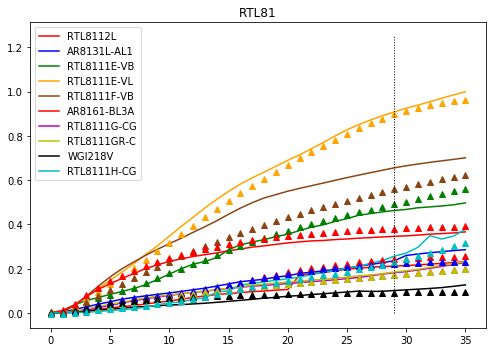


Predict (VERSION 2, num_ftr: 11) ...
all_pred.shape: (10, 48, 1)



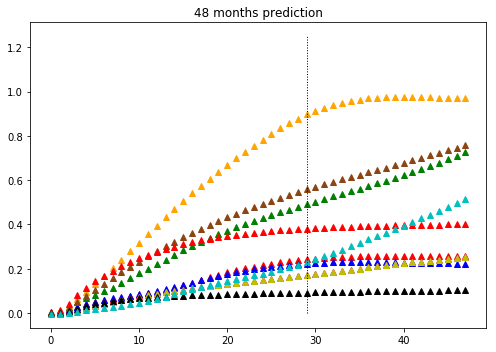

In [113]:
demo([0], model_inf)

['AR8131L-AL1E' 'AR8151' 'AR8161-AL3A-R' 'AR8161-BL3A-R']
['0   ', '4   ', '5   ', '6   ', '7   ', '8   ', '9   ', '10  ', '11  ', '12  ']
['Tmst', 'IC2L', 'Nm2G', 'Nm2L', 'AD2G', 'AD2L', 'Gd2G', 'Gd2L', 'PwPn', 'ESD ']
['0.30', '0.05', '0.20', '0.05', '0.30', '0.05', '0.75', '0.30', '0.25', '0.40']
['0.37', '0.05', '0.10', '0.05', '0.30', '0.05', '0.75', '0.30', '0.25', '0.40']
['0.45', '0.05', '0.10', '0.05', '0.30', '0.05', '0.75', '0.30', '0.25', '0.40']
['0.46', '0.05', '0.10', '0.05', '0.30', '0.05', '0.75', '0.30', '0.25', '0.40']

Predict (VERSION 2, num_ftr: 11) ...
all_pred.shape: (4, 36, 1)

Real
['0.26649', '0.27198', '0.27708', '0.28176', '0.28602']
['6.70084', '6.72437', '6.74453', '6.76680', '7.49400']
['0.20146', '0.20301', '0.20845', '0.20882', '0.21029']
['0.35188', '0.35606', '0.35872', '0.36147', '0.36632']
Prediction
['0.22695', '0.22825', '0.22913', '0.22964', '0.22985']
['0.40427', '0.40543', '0.40644', '0.40732', '0.40808']
['0.39997', '0.40182', '0.40350', '0.4

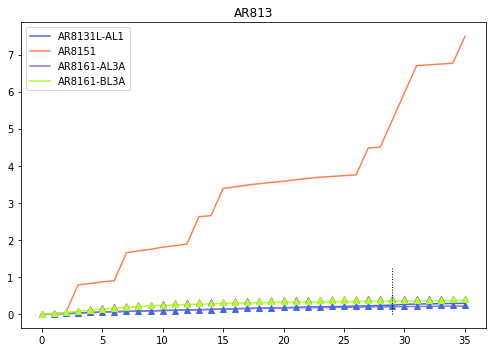


Predict (VERSION 2, num_ftr: 11) ...
all_pred.shape: (4, 48, 1)



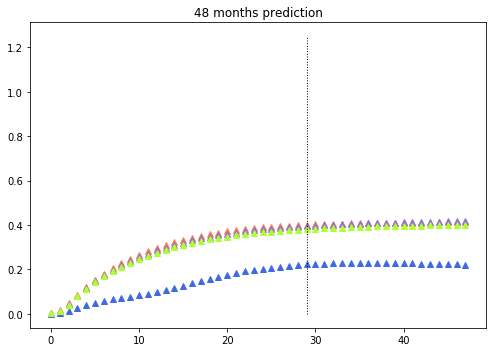

['RTL8112' 'RTL8112L' 'RTL8131' 'RTL8111DP-VC' 'RTL8111E-VB'
 'RTL8111EP-CG']
['0   ', '4   ', '5   ', '6   ', '7   ', '8   ', '9   ', '10  ', '11  ', '12  ']
['Tmst', 'IC2L', 'Nm2G', 'Nm2L', 'AD2G', 'AD2L', 'Gd2G', 'Gd2L', 'PwPn', 'ESD ']
['0.25', '0.05', '0.20', '0.05', '0.30', '0.05', '0.75', '0.30', '0.30', '0.40']
['0.26', '0.05', '0.20', '0.05', '0.30', '0.05', '0.75', '0.30', '0.30', '0.40']
['0.26', '0.05', '0.20', '0.05', '0.30', '0.05', '0.75', '0.30', '0.30', '0.40']
['0.51', '0.05', '0.20', '0.05', '0.30', '0.05', '0.75', '0.30', '0.30', '0.40']
['0.32', '0.02', '0.20', '0.05', '0.30', '0.05', '0.75', '0.30', '0.38', '0.40']
['0.60', '0.05', '0.20', '0.05', '0.30', '0.05', '0.75', '0.30', '0.30', '0.40']

Predict (VERSION 2, num_ftr: 11) ...
all_pred.shape: (6, 36, 1)

Real
['0.00000', '0.00000', '0.00000', '0.00000', '0.00000']
['0.21700', '0.22089', '0.22408', '0.22793', '0.23154']
['0.00000', '0.00000', '0.00000', '0.01686', '0.01686']
['0.00000', '0.00000', '0.00000', '

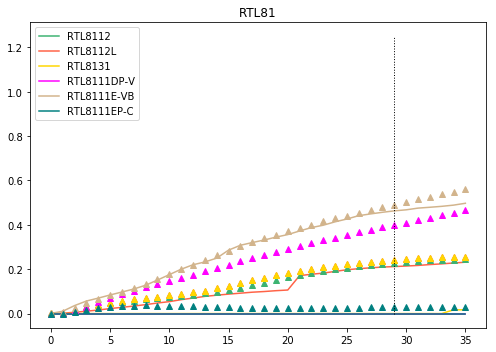


Predict (VERSION 2, num_ftr: 11) ...
all_pred.shape: (6, 48, 1)



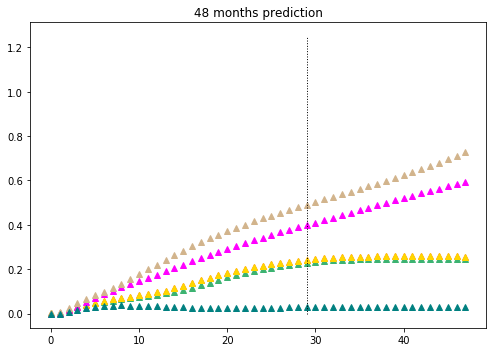

In [114]:
demo([1,2], model_inf)

['WG82567V' 'WG82578DM' 'WG82579V' 'WG82579LM' 'WG82583V']
['0   ', '4   ', '5   ', '6   ', '7   ', '8   ', '9   ', '10  ', '11  ', '12  ']
['Tmst', 'IC2L', 'Nm2G', 'Nm2L', 'AD2G', 'AD2L', 'Gd2G', 'Gd2L', 'PwPn', 'ESD ']
['0.33', '0.05', '0.20', '0.05', '0.30', '0.05', '0.75', '0.30', '0.30', '0.40']
['0.31', '0.05', '0.20', '0.05', '0.30', '0.05', '0.75', '0.30', '0.30', '0.40']
['0.36', '0.05', '0.20', '0.05', '0.30', '0.05', '0.75', '0.30', '0.30', '0.40']
['0.38', '0.05', '0.20', '0.05', '0.30', '0.05', '0.75', '0.30', '0.30', '0.40']
['0.36', '0.05', '0.20', '0.05', '0.30', '0.05', '0.75', '0.30', '0.30', '0.40']

Predict (VERSION 2, num_ftr: 11) ...
all_pred.shape: (5, 36, 1)

Real
['0.07625', '0.07625', '0.07625', '0.07625', '0.07625']
['0.06630', '0.06630', '0.06630', '0.07121', '0.07121']
['0.26807', '0.26969', '0.27097', '0.27241', '0.27819']
['0.36041', '0.36041', '0.36041', '0.36041', '0.36041']
['0.42777', '0.45763', '0.46025', '0.47402', '0.47402']
Prediction
['0.36008', 

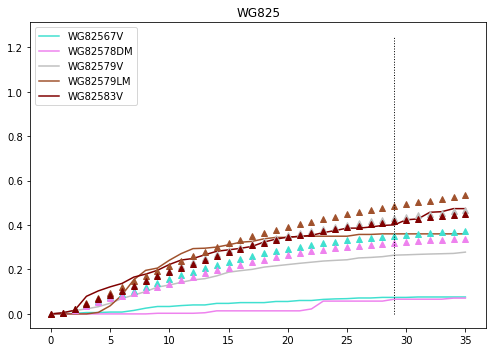


Predict (VERSION 2, num_ftr: 11) ...
all_pred.shape: (5, 48, 1)



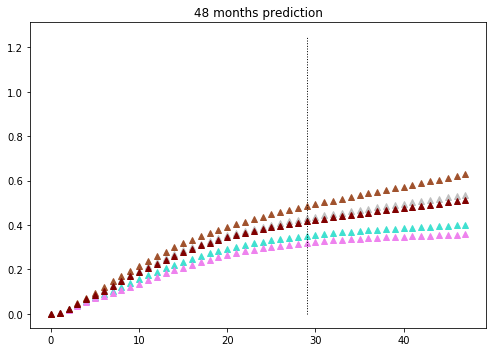

['WGI211AT(A2)' 'WGI217LM' 'WGI217V' 'WGI218V' 'WGI218LM']
['0   ', '4   ', '5   ', '6   ', '7   ', '8   ', '9   ', '10  ', '11  ', '12  ']
['Tmst', 'IC2L', 'Nm2G', 'Nm2L', 'AD2G', 'AD2L', 'Gd2G', 'Gd2L', 'PwPn', 'ESD ']
['0.58', '0.05', '0.20', '0.05', '0.30', '0.10', '0.75', '0.30', '0.38', '0.40']
['0.52', '0.05', '0.20', '0.05', '0.30', '0.05', '0.75', '0.30', '0.30', '0.40']
['0.51', '0.05', '0.20', '0.05', '0.30', '0.10', '0.75', '0.30', '0.30', '0.40']
['0.57', '0.05', '0.20', '0.05', '0.30', '0.05', '0.75', '0.30', '0.30', '0.40']
['0.59', '0.05', '0.20', '0.05', '0.30', '0.05', '0.75', '0.30', '0.30', '0.40']

Predict (VERSION 2, num_ftr: 11) ...
all_pred.shape: (5, 36, 1)

Real
['0.10725', '0.10925', '0.11062', '0.09243', '0.09434']
['0.07657', '0.07703', '0.07978', '0.08273', '0.08432']
['0.13540', '0.13751', '0.13906', '0.14007', '0.14879']
['0.10759', '0.11081', '0.11463', '0.12038', '0.12700']
['0.01612', '0.01701', '0.01801', '0.01914', '0.00847']
Prediction
['0.35646', 

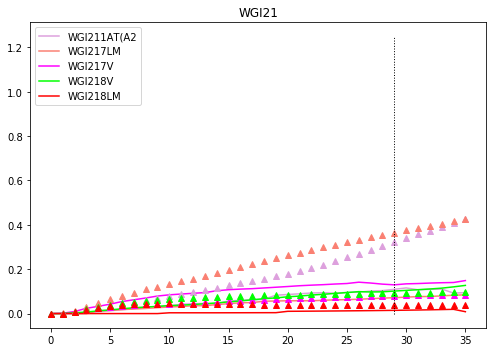


Predict (VERSION 2, num_ftr: 11) ...
all_pred.shape: (5, 48, 1)



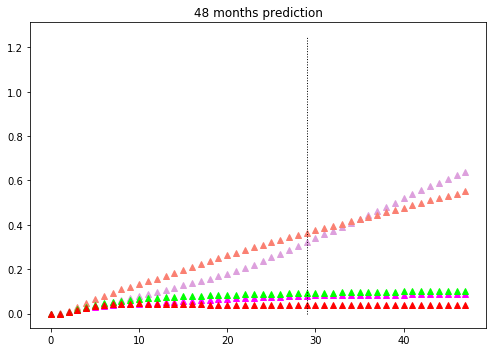

In [115]:
demo([3,4], model_inf)

In [116]:
print (LAN_NAME_ARR)

['RTL8112' 'RTL8112L' 'RTL8131' '82567LF' 'RTL8103EL' 'AR8131L-AL1E'
 'WG82578DM' 'RTL8111E-VB' 'WG82567V' 'WG82583V' 'WG82579V' 'AR8151'
 'RTL8111E-VL' 'WG82579LM' 'RTL8111F-VB' 'AR8161-AL3A-R' 'AR8161-BL3A-R'
 'RTL8111DP-VC' 'WGI217V' 'RTL8111G-CG' 'RTL8111GR-CG' 'WGI217LM'
 'WGI218V' 'WGI211AT(A2)' 'WGI218LM' 'RTL8111EP-CG' 'RTL8111H-CG']


In [117]:
def processing_lan(model, debug = False):
    
   
    if debug:
        print(["{:4s}".format(str(i)) for i in ftr_set])
        print(["{:4s}".format(ftr_dct[i]) for i in ftr_set])
    
    all_lans = list(range(len(LAN_NAME_ARR)))
    
    _, G, _ = utils.create_C(LAN_CSV_DCT, LAN_NAME_ARR, all_lans)
        
    def scale_lst_to_arr(scaler, lst):
        return np.array([scaler.transform(v) for v in lst]).reshape(len(lst))

    CFR_ARR = G.reshape(G.shape[0], G.shape[1])
    
    L = []
    [L.append(scale_lst_to_arr(C_SCALER, arr)) for arr in CFR_ARR]
    C = np.array(L).reshape(CFR_ARR.shape[0], CFR_ARR.shape[1], 1)
    S = S_ALL_NORM[all_lans]


    ts_tra = 30; ts_prd = 36
    _, _, F, Y = utils.get_xy_from_sAc(S[:,ftr_set], C[:,:,:], ts_prd, list(range(C.shape[0])))
    X = F[:,:,(3-VERSION):]
        
    #all_pred = round_part_prd(model, X[:, :ts_tra, :], ts_prd, hidden_neurons)
    all_pred = utils.round_part_prd_exp(model, F, ts_prd, hidden_neurons, version=VERSION)
    
    real_dct = dict(); prdt_dct = dict()
    
    for j in range(len(S)):
        
        nm = LAN_NAME_ARR[j]
        if debug:
            pa = ["{:0.2f}".format(s) for s in S[j]]
            print("{0}: {1}".format(nm, pa))
        
        re = Y[j].T.reshape(-1)
        pr = all_pred[j].T.reshape(-1)
        
        """
        Note that the values are scaled
        """
        #print ("{0:0.3f} {1:0.3f} {2}".format(re[-1], pr[-1], nm))
        real_dct[nm] = re[-1]
        prdt_dct[nm] = pr[-1]
        

    return real_dct, prdt_dct

REAL_DCT, PRDT_DCT = processing_lan(model_inf)

Target ids: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
c_norm.shape: (27, 36, 1)

Predict (VERSION 2, num_ftr: 11) ...
all_pred.shape: (27, 36, 1)



In [118]:
def sort_by_value(d): 
    items = d.items()
    backitems = [[v[1],v[0]] for v in items]
    backitems.sort(reverse=True)
    return [ (backitems[i][1], backitems[i][0]) for i in range(0,len(backitems)) ]

excluded_sets = []
excluded_sets.append([])

"""
Abnormal
"""
exclude0 = ['82567LF', 'AR8151']
excluded_sets.append(exclude0)
group_a = [v for v in LAN_NAME_LST if v not in excluded_sets[1]]
"""
Below 1000
"""
excluded = ['WG82578DM', 'WGI218LM', 'RTL8112', 'RTL8131', 'RTL8111DP-VC', 'RTL8111EP-CG',
            'RTL8103EL'] # '82567LM'
excluded_sets.append(exclude0 + excluded)
group_b = [v for v in LAN_NAME_LST if v not in excluded_sets[2]]
"""
Exceed 1000, Below 10000
"""
exclude2 = ['WG82567V', 'WG82579LM', 'WG82583V', 'WGI211AT(A2)', 'WGI217LM']
excluded_sets.append(exclude0 + excluded + exclude2)
group_c = [v for v in LAN_NAME_LST if v not in excluded_sets[3]]
"""
Exceed 10000, Below 70000
"""
exclude3 = ['WG82579V', 'WGI217V', 'AR8161-AL3A-R']
excluded_sets.append(exclude0 + excluded + exclude2 + exclude3)
group_d = [v for v in LAN_NAME_LST if v not in excluded_sets[4]]


In [119]:

print("ftr_set: {0}, VERSION: {1}".format(ftr_set, VERSION))
print("model: {0}\n".format(MODEL_PATH))
for set_num in range(0, len(ALL_SETS)):

    names = LAN_NAME_ARR[ALL_SETS[set_num]]
    print(names)
    
    prdt_dct = dict(); real_dct = dict()
    for name in names:
        prdt_dct[name] = PRDT_DCT[name]; real_dct[name] = REAL_DCT[name]    
    
    A = sort_by_value(real_dct)
    ans_lst = [A[i][1] for i in range(len(A)) if A[i][0] not in excluded]
    ans_lsn = [A[i][0] for i in range(len(A)) if A[i][0] not in excluded]
    
    real_dct_sub = {}
    for n in ans_lsn:
        real_dct_sub[n] = real_dct[n]
    
    
    P = sort_by_value(prdt_dct)
    prd_lst = [REAL_DCT[P[i][0]] for i in range(len(P)) if P[i][0] not in excluded]
    prd_lsn = [P[i][0] for i in range(len(P)) if P[i][0] not in excluded]
    
    prdt_dct_sub = {}
    for n in prd_lsn:
        prdt_dct_sub[n] = prdt_dct[n]
    
    kt = utils.kend_cust(real_dct_sub, prdt_dct_sub, tolerance=0.01)
    
    print("Kendall: {0:0.4f}, nDCG: {1:0.4f}".
          format(kt, utils.ndcg_at_k(prd_lst, len(prd_lst)+1)))
    
    print("{0:13s} | {1:13s}".format("Real", "Prdt"))
    for i in range(len(ans_lsn)):
        print("{0:13s} | {1:13s}".format(ans_lsn[i], prd_lsn[i]))
    print("\n")
    

ftr_set: [0, 4, 5, 6, 7, 8, 9, 10, 11, 12], VERSION: 2
model: ./ongo/CFR_MODEL_LSTM[LrDsDsDsDsDr_f11hn512bs3dp0.001]_Model_R0_aefghijklm_v2_LTB_spc1.h5

['RTL8112L' 'AR8131L-AL1E' 'RTL8111E-VB' 'RTL8111E-VL' 'RTL8111F-VB'
 'AR8161-BL3A-R' 'RTL8111G-CG' 'RTL8111GR-CG' 'WGI218V' 'RTL8111H-CG']
Kendall: 0.0444, nDCG: 0.9991
Real          | Prdt         
RTL8111E-VL   | RTL8111E-VL  
RTL8111F-VB   | RTL8111F-VB  
RTL8111E-VB   | RTL8111E-VB  
RTL8111H-CG   | AR8161-BL3A-R
AR8161-BL3A-R | RTL8111H-CG  
AR8131L-AL1E  | RTL8112L     
RTL8112L      | AR8131L-AL1E 
RTL8111GR-CG  | RTL8111GR-CG 
RTL8111G-CG   | RTL8111G-CG  
WGI218V       | WGI218V      


['AR8131L-AL1E' 'AR8151' 'AR8161-AL3A-R' 'AR8161-BL3A-R']
Kendall: 0.3333, nDCG: 0.9917
Real          | Prdt         
AR8151        | AR8151       
AR8161-BL3A-R | AR8161-AL3A-R
AR8131L-AL1E  | AR8161-BL3A-R
AR8161-AL3A-R | AR8131L-AL1E 


['RTL8112' 'RTL8112L' 'RTL8131' 'RTL8111DP-VC' 'RTL8111E-VB'
 'RTL8111EP-CG']
Kendall: 0.0000, nDCG: 1.00

In [120]:
def eva_by_group(A, P, excld, highlight = [], tolerance = 0.01):
    print("spcpath: {0}".format(spcpath))
    print("ftr_set: {0}, VERSION: {1}".format(ftr_set, VERSION))
    print("model: {0}".format(MODEL_PATH))
    print("kt toler. = {0}\n".format(tolerance))
    
    
    ORG = sorted(set(spc_csv.loc[spc_csv['LAN'].isin(LN5_SET)].index.tolist()))
    EXC = excld#+list(LAN_NAME_ARR[ORG]) # TARGET or ORG
    
    ans_lst = [A[i][1] for i in range(len(A)) if A[i][0] not in EXC]
    ans_lsn = [A[i][0] for i in range(len(A)) if A[i][0] not in EXC]
    prd_lst = [REAL_DCT[P[i][0]] for i in range(len(P)) if P[i][0] not in EXC]
    prd_lsn = [P[i][0] for i in range(len(P)) if P[i][0] not in EXC]
    
    dct1=dict(); dct2=dict()
    for name in PRDT_DCT:
        if name not in EXC:
            dct1[name] = PRDT_DCT[name]; dct2[name] = REAL_DCT[name]
    
    kt = utils.kend_cust(dct1, dct2, tolerance)
    ng = utils.ndcg_at_k(prd_lst, len(prd_lst)+1)
   
    print("Group: {0}\nKendall: {1:0.4f}, nDCG: {2:0.4f}\n".format(len(ans_lsn), kt, ng))
    
    print("|{0:3s} |{1:15s} | {2:15s}|".format("Ord", "Real", "Prdt"))
    print("|{0:3s} |{1:15s} | {2:15s}|".format("-", "-", "-"))
    for i in range(len(ans_lsn)):
        an = ans_lsn[i]; pn = prd_lsn[i];
        if an in highlight:
            an = "*"+an+"*"
        if pn in highlight:
            pn = "*"+pn+"*"
        print("|{0:3s} |{1:15s} | {2:15s}|".format(str(i), an, pn))
    print("\n")
    return
    

In [121]:
A = sort_by_value(REAL_DCT); P = sort_by_value(PRDT_DCT)

In [122]:
print(TAR_NAMES)

['RTL8112L', 'AR8131L-AL1E', 'RTL8111E-VB', 'RTL8111E-VL', 'RTL8111F-VB', 'AR8161-BL3A-R', 'RTL8111G-CG', 'RTL8111GR-CG', 'WGI218V', 'RTL8111H-CG']


In [123]:
not_in_tra = [v for v in LAN_NAME_LST if v not in TAR_NAMES]
eva_by_group(A, P, not_in_tra)

spcpath: ./data/lan_spc_1.csv
ftr_set: [0, 4, 5, 6, 7, 8, 9, 10, 11, 12], VERSION: 2
model: ./ongo/CFR_MODEL_LSTM[LrDsDsDsDsDr_f11hn512bs3dp0.001]_Model_R0_aefghijklm_v2_LTB_spc1.h5
kt toler. = 0.01

Group: 10
Kendall: 0.0444, nDCG: 0.9991

|Ord |Real            | Prdt           |
|-   |-               | -              |
|0   |RTL8111E-VL     | RTL8111E-VL    |
|1   |RTL8111F-VB     | RTL8111F-VB    |
|2   |RTL8111E-VB     | RTL8111E-VB    |
|3   |RTL8111H-CG     | AR8161-BL3A-R  |
|4   |AR8161-BL3A-R   | RTL8111H-CG    |
|5   |AR8131L-AL1E    | RTL8112L       |
|6   |RTL8112L        | AR8131L-AL1E   |
|7   |RTL8111GR-CG    | RTL8111GR-CG   |
|8   |RTL8111G-CG     | RTL8111G-CG    |
|9   |WGI218V         | WGI218V        |




In [124]:
# for excld in excluded_sets[:1]:
eva_by_group(A, P, excluded_sets[0], excluded_sets[1])

spcpath: ./data/lan_spc_1.csv
ftr_set: [0, 4, 5, 6, 7, 8, 9, 10, 11, 12], VERSION: 2
model: ./ongo/CFR_MODEL_LSTM[LrDsDsDsDsDr_f11hn512bs3dp0.001]_Model_R0_aefghijklm_v2_LTB_spc1.h5
kt toler. = 0.01

Group: 27
Kendall: 0.3134, nDCG: 0.5196

|Ord |Real            | Prdt           |
|-   |-               | -              |
|0   |*AR8151*        | RTL8111E-VL    |
|1   |RTL8111E-VL     | RTL8111F-VB    |
|2   |RTL8111F-VB     | RTL8111E-VB    |
|3   |RTL8111E-VB     | WG82579LM      |
|4   |WG82583V        | WG82579V       |
|5   |RTL8111H-CG     | RTL8111DP-VC   |
|6   |AR8161-BL3A-R   | WG82583V       |
|7   |WG82579LM       | WGI211AT(A2)   |
|8   |AR8131L-AL1E    | WGI217LM       |
|9   |WG82579V        | *AR8151*       |
|10  |RTL8112L        | AR8161-AL3A-R  |
|11  |RTL8111GR-CG    | AR8161-BL3A-R  |
|12  |RTL8111G-CG     | WG82567V       |
|13  |AR8161-AL3A-R   | WG82578DM      |
|14  |WGI217V         | RTL8111H-CG    |
|15  |WGI218V         | RTL8103EL      |
|16  |WGI211AT(A2)   

In [125]:
eva_by_group(A, P, excluded_sets[1], excluded_sets[2])

spcpath: ./data/lan_spc_1.csv
ftr_set: [0, 4, 5, 6, 7, 8, 9, 10, 11, 12], VERSION: 2
model: ./ongo/CFR_MODEL_LSTM[LrDsDsDsDsDr_f11hn512bs3dp0.001]_Model_R0_aefghijklm_v2_LTB_spc1.h5
kt toler. = 0.01

Group: 25
Kendall: 0.3000, nDCG: 0.9592

|Ord |Real            | Prdt           |
|-   |-               | -              |
|0   |RTL8111E-VL     | RTL8111E-VL    |
|1   |RTL8111F-VB     | RTL8111F-VB    |
|2   |RTL8111E-VB     | RTL8111E-VB    |
|3   |WG82583V        | WG82579LM      |
|4   |RTL8111H-CG     | WG82579V       |
|5   |AR8161-BL3A-R   | *RTL8111DP-VC* |
|6   |WG82579LM       | WG82583V       |
|7   |AR8131L-AL1E    | WGI211AT(A2)   |
|8   |WG82579V        | WGI217LM       |
|9   |RTL8112L        | AR8161-AL3A-R  |
|10  |RTL8111GR-CG    | AR8161-BL3A-R  |
|11  |RTL8111G-CG     | WG82567V       |
|12  |AR8161-AL3A-R   | *WG82578DM*    |
|13  |WGI217V         | RTL8111H-CG    |
|14  |WGI218V         | *RTL8103EL*    |
|15  |WGI211AT(A2)    | *RTL8131*      |
|16  |WGI217LM       

In [126]:
eva_by_group(A, P, excluded_sets[2], excluded_sets[3])

spcpath: ./data/lan_spc_1.csv
ftr_set: [0, 4, 5, 6, 7, 8, 9, 10, 11, 12], VERSION: 2
model: ./ongo/CFR_MODEL_LSTM[LrDsDsDsDsDr_f11hn512bs3dp0.001]_Model_R0_aefghijklm_v2_LTB_spc1.h5
kt toler. = 0.01

Group: 18
Kendall: 0.2680, nDCG: 0.9772

|Ord |Real            | Prdt           |
|-   |-               | -              |
|0   |RTL8111E-VL     | RTL8111E-VL    |
|1   |RTL8111F-VB     | RTL8111F-VB    |
|2   |RTL8111E-VB     | RTL8111E-VB    |
|3   |*WG82583V*      | *WG82579LM*    |
|4   |RTL8111H-CG     | WG82579V       |
|5   |AR8161-BL3A-R   | *WG82583V*     |
|6   |*WG82579LM*     | *WGI211AT(A2)* |
|7   |AR8131L-AL1E    | *WGI217LM*     |
|8   |WG82579V        | AR8161-AL3A-R  |
|9   |RTL8112L        | AR8161-BL3A-R  |
|10  |RTL8111GR-CG    | *WG82567V*     |
|11  |RTL8111G-CG     | RTL8111H-CG    |
|12  |AR8161-AL3A-R   | RTL8112L       |
|13  |WGI217V         | AR8131L-AL1E   |
|14  |WGI218V         | RTL8111GR-CG   |
|15  |*WGI211AT(A2)*  | RTL8111G-CG    |
|16  |*WGI217LM*     

In [127]:
eva_by_group(A, P, excluded_sets[3], excluded_sets[4])

spcpath: ./data/lan_spc_1.csv
ftr_set: [0, 4, 5, 6, 7, 8, 9, 10, 11, 12], VERSION: 2
model: ./ongo/CFR_MODEL_LSTM[LrDsDsDsDsDr_f11hn512bs3dp0.001]_Model_R0_aefghijklm_v2_LTB_spc1.h5
kt toler. = 0.01

Group: 13
Kendall: 0.1538, nDCG: 0.9907

|Ord |Real            | Prdt           |
|-   |-               | -              |
|0   |RTL8111E-VL     | RTL8111E-VL    |
|1   |RTL8111F-VB     | RTL8111F-VB    |
|2   |RTL8111E-VB     | RTL8111E-VB    |
|3   |RTL8111H-CG     | *WG82579V*     |
|4   |AR8161-BL3A-R   | *AR8161-AL3A-R*|
|5   |AR8131L-AL1E    | AR8161-BL3A-R  |
|6   |*WG82579V*      | RTL8111H-CG    |
|7   |RTL8112L        | RTL8112L       |
|8   |RTL8111GR-CG    | AR8131L-AL1E   |
|9   |RTL8111G-CG     | RTL8111GR-CG   |
|10  |*AR8161-AL3A-R* | RTL8111G-CG    |
|11  |*WGI217V*       | WGI218V        |
|12  |WGI218V         | *WGI217V*      |




In [128]:
eva_by_group(A, P, excluded_sets[4])

spcpath: ./data/lan_spc_1.csv
ftr_set: [0, 4, 5, 6, 7, 8, 9, 10, 11, 12], VERSION: 2
model: ./ongo/CFR_MODEL_LSTM[LrDsDsDsDsDr_f11hn512bs3dp0.001]_Model_R0_aefghijklm_v2_LTB_spc1.h5
kt toler. = 0.01

Group: 10
Kendall: 0.0444, nDCG: 0.9991

|Ord |Real            | Prdt           |
|-   |-               | -              |
|0   |RTL8111E-VL     | RTL8111E-VL    |
|1   |RTL8111F-VB     | RTL8111F-VB    |
|2   |RTL8111E-VB     | RTL8111E-VB    |
|3   |RTL8111H-CG     | AR8161-BL3A-R  |
|4   |AR8161-BL3A-R   | RTL8111H-CG    |
|5   |AR8131L-AL1E    | RTL8112L       |
|6   |RTL8112L        | AR8131L-AL1E   |
|7   |RTL8111GR-CG    | RTL8111GR-CG   |
|8   |RTL8111G-CG     | RTL8111G-CG    |
|9   |WGI218V         | WGI218V        |


